In [388]:
#Group members: Jesse Seth-David and Oluwafikayo Oyinloye
#Motivation: This data set was chosen to display the use of different classification algorithms to decide if a wine
#is either good or bad

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.svm import SVC
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [389]:
data = pd.read_csv('winequality-red.csv')
data.head()
#data contains 12 attributes
# the first 11 are ingredients of a wine with the quality column ranging from 3 to 8

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [390]:
data.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.0

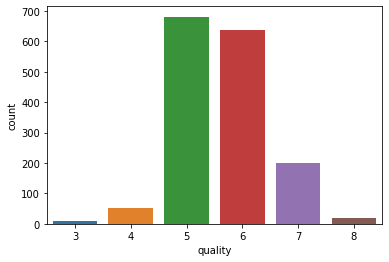

In [391]:
#from the quality column, we see how skewed the data is.
#to balance this below
sns.countplot(data['quality'])
plt.show()

In [392]:
#X consists of everyother column but quality
X = data.drop(columns=['quality'])
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [393]:
y= data['quality']
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [394]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [395]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [396]:
#to help with the data processing
#split the quality column into 2, 6.6 being the base value to determine if the wine quality is either good or bad
#6.6 was gotten as the average of the lowest value (3) and highest value (8)
#0 represent bad
#1 represent good
#we create a new column called reviews to hold the our new values
reviews = []
for x in data['quality']:
    if x >= 3 and x <= 6.6:
        reviews.append('0')
    elif x>=7 and x<=8:
        reviews.append('1')
data['reviews'] = reviews

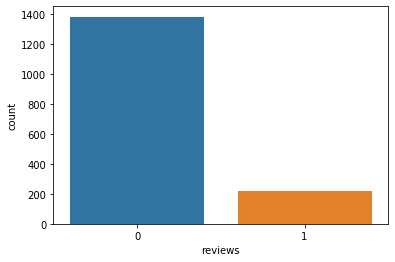

In [397]:
#here we can with the quality split into two features, it's easier for the model to classify the wine
sns.countplot(data['reviews'])
plt.show()

In [398]:
#set the y to the new reviews column
y = data['reviews']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: reviews, dtype: object

In [399]:
X.head()
#using standard scaler to standarize the input to increase accuracy
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [426]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35) #split the data set into 65-35
#70-30 got the best accuracy
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1039, 11)
(1039,)
(560, 11)
(560,)


In [427]:
#using LogistRegression model
lgr = LogisticRegression();
lgr.fit(X_train,y_train)
LR_predictions = lgr.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [443]:
print("Accuracy of Logistic Regression " + str(metrics.accuracy_score(y_test, LR_predictions)))
lg_Acc=metrics.accuracy_score(y_test, LR_predictions)

Accuracy of Logistic Regression 0.8714285714285714


In [451]:

svc = SVC()
#fit
svc.fit(X_train, y_train)

#predict
pred_svc = svc.predict(X_test)

#accuracy for SVM
print("Accuracy of SVM " + str(metrics.accuracy_score(y_test,pred_svc)))
svc_acc = metrics.accuracy_score(y_test,pred_svc)

Accuracy of SVM 0.8625


In [452]:
dtc = DecisionTreeClassifier(random_state=0, criterion='gini')

# 2. Fit
dtc.fit(X_train, y_train)

# 3. Predict, 
predictions = dtc.predict(X_test)

#accuracy for using Decision tree Classifier

print("Accuracy of Decision Trees " + str(metrics.accuracy_score(y_test,predictions)))
dtc_acc = metrics.accuracy_score(y_test,predictions)

Accuracy of Decision Trees 0.8535714285714285


In [453]:
# k=2 get's the best accuracy
k=2
knn = KNeighborsClassifier(n_neighbors=k)

# train the model
knn.fit(X_train, y_train)

# and use it to predict our data
y_pred = knn.predict(X_test)
print("Accuracy of the KNN predictor with k=" + str(k)+": " + str(metrics.accuracy_score(y_test, y_pred)))
knn_acc = metrics.accuracy_score(y_test, y_pred)

Accuracy of the KNN predictor with k=2: 0.8767857142857143


In [454]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.8652445855115756, 0.8758401792382375, 0.8594846900672142, 0.866224794622853, 0.8575616131441374, 0.8546583271097834, 0.8566094100074683, 0.8575616131441374, 0.857580283793876, 0.8604555638536221, 0.8604555638536222, 0.8652725914861836, 0.8643110530246453, 0.86142643764003, 0.8633401792382376, 0.8623786407766991, 0.8575616131441374, 0.8594940253920837, 0.8633401792382376, 0.8623786407766991, 0.8633401792382376, 0.8633401792382376, 0.8652632561613144, 0.8633401792382376, 0.8643017176997759, 0.864301717699776, 0.8623693054518297, 0.864301717699776, 0.8652632561613144, 0.8652632561613144]


In [455]:
nbc = GaussianNB()
#train the model
nbc.fit(X_train, y_train)
#predict our data
nbc_predictions = nbc.predict(X_test)
print("(ON THE TEST SET) Accuracy of the Gaussian Naive Bayes classifier " + str(metrics.accuracy_score(nbc_predictions, y_test)))
nbc_acc=metrics.accuracy_score(nbc_predictions, y_test)

(ON THE TEST SET) Accuracy of the Gaussian Naive Bayes classifier 0.8303571428571429


In [456]:
model_List=['Logistic Regression','SVM Model','Decision Trees','KNN Classification','GaussianNB']
print(model_List)

['Logistic Regression', 'SVM Model', 'Decision Trees', 'KNN Classification', 'GaussianNB']


In [458]:
model_Accuracy=[lg_Acc,svc_acc,dtc_acc,knn_acc,nbc_acc]
print(model_Accuracy)

[0.8714285714285714, 0.8625, 0.8535714285714285, 0.8767857142857143, 0.8303571428571429]


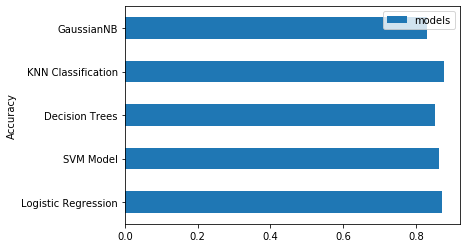

In [461]:
df = pd.DataFrame({'Accuracy':model_List, 'models':model_Accuracy})
ax = df.plot.barh(x='Accuracy', y='models')

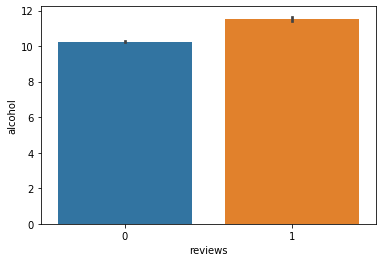

In [464]:
#knn proved to be the best model through hitting the highest accuracy
#Although with supervised learning, Logistic Regression come in first place, posting the highest accuracy.
#second place is the SVM Model

#it is worth noting that all the attributes were used as features to decide the quality of a wine
#The question arises, what happens if we reduce the features?
sns.barplot(x = 'reviews', y = 'alcohol', data = data)
#here we see that wine with a higher alcohol density are perceived to be of better quality

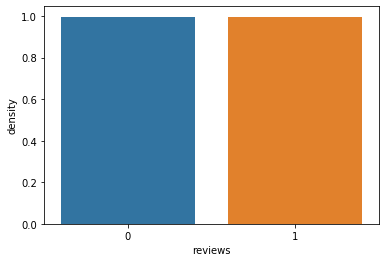

In [465]:
sns.barplot(x = 'reviews', y = 'density', data = data)
#here we see that the density of the wine does not have a huge impact on the quality of the wine with the results
#being almost identical

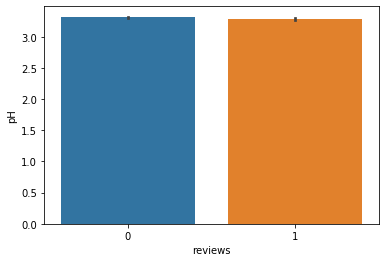

In [467]:
sns.barplot(x = 'reviews', y = 'pH', data = data)
#here we see that the pH of the wine does not have a huge impact on the quality of the wine with the results
#being almost identical

In [470]:
test_X=data.drop(columns=['quality','pH','density','reviews'])
test_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4


In [471]:
X_train, X_test, y_train, y_test = train_test_split(test_X, y, test_size = 0.35)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [473]:
lgr = LogisticRegression();
lgr.fit(X_train,y_train)
LR_predictions = lgr.predict(X_test)
print("Accuracy of Logistic Regression " + str(metrics.accuracy_score(y_test, LR_predictions)))
lg_Acc=metrics.accuracy_score(y_test, LR_predictions)

Accuracy of Logistic Regression 0.8928571428571429


In [474]:

svc = SVC()
#fit
svc.fit(X_train, y_train)

#predict
pred_svc = svc.predict(X_test)

#accuracy for SVM
print("Accuracy of SVM " + str(metrics.accuracy_score(y_test,pred_svc)))
svc_acc = metrics.accuracy_score(y_test,pred_svc)

Accuracy of SVM 0.8946428571428572


In [477]:
k=2
knn = KNeighborsClassifier(n_neighbors=k)

# train the model
knn.fit(X_train, y_train)

# and use it to predict our data
y_pred = knn.predict(X_test)
print("Accuracy of the KNN predictor with k=" + str(k)+": " + str(metrics.accuracy_score(y_test, y_pred)))
knn_acc = metrics.accuracy_score(y_test, y_pred)

Accuracy of the KNN predictor with k=2: 0.8892857142857142


In [478]:
nbc = GaussianNB()
#train the model
nbc.fit(X_train, y_train)
#predict our data
nbc_predictions = nbc.predict(X_test)
print("(ON THE TEST SET) Accuracy of the Gaussian Naive Bayes classifier " + str(metrics.accuracy_score(nbc_predictions, y_test)))
nbc_acc=metrics.accuracy_score(nbc_predictions, y_test)

(ON THE TEST SET) Accuracy of the Gaussian Naive Bayes classifier 0.8464285714285714


In [ ]:
#Here we see a little jump in performance